In [85]:
from itertools import cycle
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator, AutoLocator
from mpltools import annotation

plt.style.use('seaborn-poster')

/tmp/ipykernel_11158/1257321078.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


In [86]:
!ls

cond_lsh_comparison_deg_1.png		  results_deg_lsh_
cond_lsh_comparison_deg_1_quad.png	  results_deg_lsh_alternative
cond_lsh_comparison_deg_1_tri.png	  results_deg_var_cg_quad
cond_lsh_comparison_deg_2.5.png		  results_deg_var_cg_tri
cond_lsh_comparison_deg_2.png		  results_deg_var_clsq_quad
cond_lsh_comparison_deg_2_quad.png	  results_deg_var_clsq_tri
cond_lsh_comparison_deg_2_tri.png	  results_deg_var_dls_quad
cond_lsh_comparison_deg_3.png		  results_deg_var_dls_tri
cond_lsh_comparison_deg_3_quad.png	  results_deg_var_hdg_quad
cond_lsh_comparison_deg_3_tri.png	  results_deg_var_hdg_tri
cond_lsh_comparison_deg_4.png		  results_deg_var_lsh_alternative
cond_lsh_comparison_deg_4_quad.png	  results_deg_var_lsh_alternative_tri
cond_lsh_comparison_deg_4_tri.png	  results_deg_var_lsh_mesh
cond_lsh_comparison_deg_5.png		  results_deg_var_lsh_quad
cond_lsh_comparison_fixed_mesh_quad.png   results_deg_var_lsh_quad_mesh
cond_lsh_comparison_fixed_mesh_tri.png	  results_deg_var_lsh_tri
cond_num_plo

In [87]:
geometry_suffix = 'tri'
result_cases_dirname_list = {
    "CG": f"results_deg_var_cg_{geometry_suffix}",
    # "HDG": f"results_deg_var_hdg_{geometry_suffix}",
    # "CLSq": f"results_deg_var_clsq_{geometry_suffix}",
    # "DLS": f"results_deg_var_dls_{geometry_suffix}",
    # "LS-h (mesh-free)": f"results_deg_var_lsh_{geometry_suffix}",
    # "LS-h": f"results_deg_var_lsh_{geometry_suffix}_mesh",
    # "LS-h": f"results_deg_var_lsh_alternative_{geometry_suffix}",
    "SIPG": "results_deg_var_sipg",
    "PDLS": "results_deg_var_pdls",
    "PDLS-IP": "results_deg_var_pdlsip",
    "PDLS-h": "results_deg_var_pdlsh",
    "PDGLS-h": "results_deg_var_pdglsh",
}

In [88]:
all_results = dict()
for case in result_cases_dirname_list:
    dirname = result_cases_dirname_list[case]
    df_result_case = pd.read_csv("./%s/cond_numbers.csv" % dirname)
    columns_to_apply = ["h", "Condition Number"]
    df_result_case[columns_to_apply] = df_result_case[columns_to_apply].apply(lambda x: np.log10(x))
    all_results[case] = df_result_case
    
all_results

{'CG':     Unnamed: 0 Element  Number of Elements  Degree  Symmetric    nnz  dofs  \
 0            0     Tri                  36       1       True    161    49   
 1            1     Tri                  64       1       True    313    81   
 2            2     Tri                 100       1       True    537   121   
 3            3     Tri                 144       1       True    809   169   
 4            4     Tri                 196       1       True   1137   225   
 5            5     Tri                  36       2       True   1181   169   
 6            6     Tri                  64       2       True   2293   289   
 7            7     Tri                 100       2       True   3773   441   
 8            8     Tri                 144       2       True   5621   625   
 9            9     Tri                 196       2       True   7837   841   
 10          10     Tri                  36       3       True   4213   361   
 11          11     Tri                  64   

In [89]:
results_deg1 = dict()
results_deg2 = dict()
results_deg3 = dict()
results_deg4 = dict()

for case in result_cases_dirname_list:
    results_deg1[case] = all_results[case][all_results[case]["Degree"] == 1]
    results_deg2[case] = all_results[case][all_results[case]["Degree"] == 2]
    results_deg3[case] = all_results[case][all_results[case]["Degree"] == 3]
    results_deg4[case] = all_results[case][all_results[case]["Degree"] == 4]
    
results_deg1

{'CG':    Unnamed: 0 Element  Number of Elements  Degree  Symmetric   nnz  dofs  \
 0           0     Tri                  36       1       True   161    49   
 1           1     Tri                  64       1       True   313    81   
 2           2     Tri                 100       1       True   537   121   
 3           3     Tri                 144       1       True   809   169   
 4           4     Tri                 196       1       True  1137   225   
 
           h  Condition Number  
 0 -0.627636          1.143895  
 1 -0.752575          1.402676  
 2 -0.849485          1.600575  
 3 -0.928666          1.761142  
 4 -0.995613          1.896361  ,
 'SIPG': Empty DataFrame
 Columns: [Unnamed: 0, Element, Number of Elements, Degree, Symmetric, nnz, dofs, h, Condition Number]
 Index: [],
 'PDLS': Empty DataFrame
 Columns: [Unnamed: 0, Element, Number of Elements, Degree, Symmetric, nnz, dofs, h, Condition Number]
 Index: [],
 'PDLS-IP': Empty DataFrame
 Columns: [Unnamed: 0, 

In [90]:
def plot_cond_number_fixed_degree(
    selected_cases,
    results,
    degree,
    ncol=2,
    slope_cond_number=None,
    slope_marker_idx_to_plot=None,
    save_plot=False,
    file_to_save='',
    dir_to_save='',
    figure_extension='png',
    display_plot=True,
    high_quality=False,
    size_frac=0.2,
    figsize=(8, 10)
):
    if high_quality:
            fig, ax = plt.subplots(figsize=figsize, dpi=500)
    else:
        fig, ax = plt.subplots(figsize=figsize)

    cycle_colors = cycle('brgcmk')
    markers = cycle(('s', '*', '^', 'o', 'D', '>', '<'))
    for case in selected_cases:
        color_scalar = next(cycle_colors)
        # mesh_size = np.log10(-results[case]["h"].values)
        mesh_size = -results[case]["h"].values
        # mesh_size = np.log10(results[case]["dofs"].values)
        # cond_numbers = np.log10(results[case]["Condition Number"].values)
        cond_numbers = results[case]["Condition Number"].values
        
        x_axis_values = mesh_size
        y_axis_values = cond_numbers

        marker_scalar = next(markers)
#         ax.plot([np.nan], [np.nan], '', color='w', label='%s:' % case)
        ax.plot(
            x_axis_values, 
            y_axis_values,
            linestyle="-",
            marker=marker_scalar,
            color=color_scalar,
            markersize=15,
            linewidth=3,
            label=f"{case}"
        )
        
        if isinstance(slope_cond_number, list):
            for slope in slope_cond_number:
                slope_value = slope
                # red_x, red_y = slope_cond_number
                id_ref_solution_point_to_marker_default = int(len(y_axis_values) / 2)
                id_ref_marker = id_ref_solution_point_to_marker_default
                if slope_marker_idx_to_plot is not None:
                    id_ref_marker = slope_marker_idx_to_plot
                    scalar_marker_x = x_axis_values[id_ref_marker] - 0.025 * x_axis_values[id_ref_marker]
                    scalar_marker_y = 1.01 * y_axis_values[id_ref_marker]
                    annotation.slope_marker(
                        origin=(scalar_marker_x, scalar_marker_y), 
                        slope=slope_value, 
                        invert=True, 
                        size_frac=size_frac, 
                        pad_frac=0.1, 
                        text_kwargs={
                            'fontsize': 18,
                            # 'text': slope_scalar,
                            'color': 'k'
                        },
                        poly_kwargs={
                            'color': 'k',
                            'alpha': 1
                        },
                        ax=ax
                    )
        elif isinstance(slope_cond_number, dict):
            for method_name, slope_value in slope_cond_number.items():
                if case == method_name:
                    id_ref_solution_point_to_marker_default = int(len(y_axis_values) / 2)
                    id_ref_marker = id_ref_solution_point_to_marker_default
                    if slope_marker_idx_to_plot is not None:
                        id_ref_marker = slope_marker_idx_to_plot
                        scalar_marker_x = x_axis_values[id_ref_marker] - 0.025 * x_axis_values[id_ref_marker]
                        scalar_marker_y = 1.015 * y_axis_values[id_ref_marker]
                        annotation.slope_marker(
                            origin=(scalar_marker_x, scalar_marker_y), 
                            slope=slope_value, 
                            invert=True, 
                            size_frac=size_frac, 
                            pad_frac=0.1, 
                            text_kwargs={
                                'fontsize': 18,
                                # 'text': slope_scalar,
                                'color': 'k'
                            },
                            poly_kwargs={
                                'color': 'k',
                                'alpha': 1
                            },
                            ax=ax
                        )
        else:
            pass
        
    box = ax.get_position()
#     ax.set_position([box.x0, box.y0 + box.height * 0.1,
#                      box.width, box.height * 0.9])
    ax.legend(loc='center', bbox_to_anchor=(0.5, 1.075),
              fancybox=True, shadow=True, ncol=ncol)
    
    plt.xlabel(r"$-\log_{10}( h )$")
    # plt.ylabel(r"$\log\left(\kappa_2(\mathbf{S})\right)$")
    plt.ylabel(r"$\log_{10}(\kappa_2(\mathbf{S}))$")

    ax.tick_params(which='both', top=True, right=True)
    ax.xaxis.set_major_locator(AutoLocator())
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_major_locator(AutoLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which='both', width=2)
    ax.tick_params(which='major', length=8)
    ax.tick_params(which='minor', length=4)

    plt.tight_layout()
    if save_plot:
        if dir_to_save == '':
            dir_to_save = './cond_result'

        os.makedirs(dir_to_save, exist_ok=True)

        if file_to_save == '':
            file_to_save = 'plot_cond_%i' % degree

        file_to_save = file_to_save + (".%s" % figure_extension)
        plt.savefig(file_to_save, bbox_inches='tight')

    if display_plot:
        plt.show()
        
    return

/home/diego/firedrake/lib/python3.9/site-packages/mpltools/annotation/_slopemarker.py:128: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  return plt.Polygon(verts, **poly_kwargs)


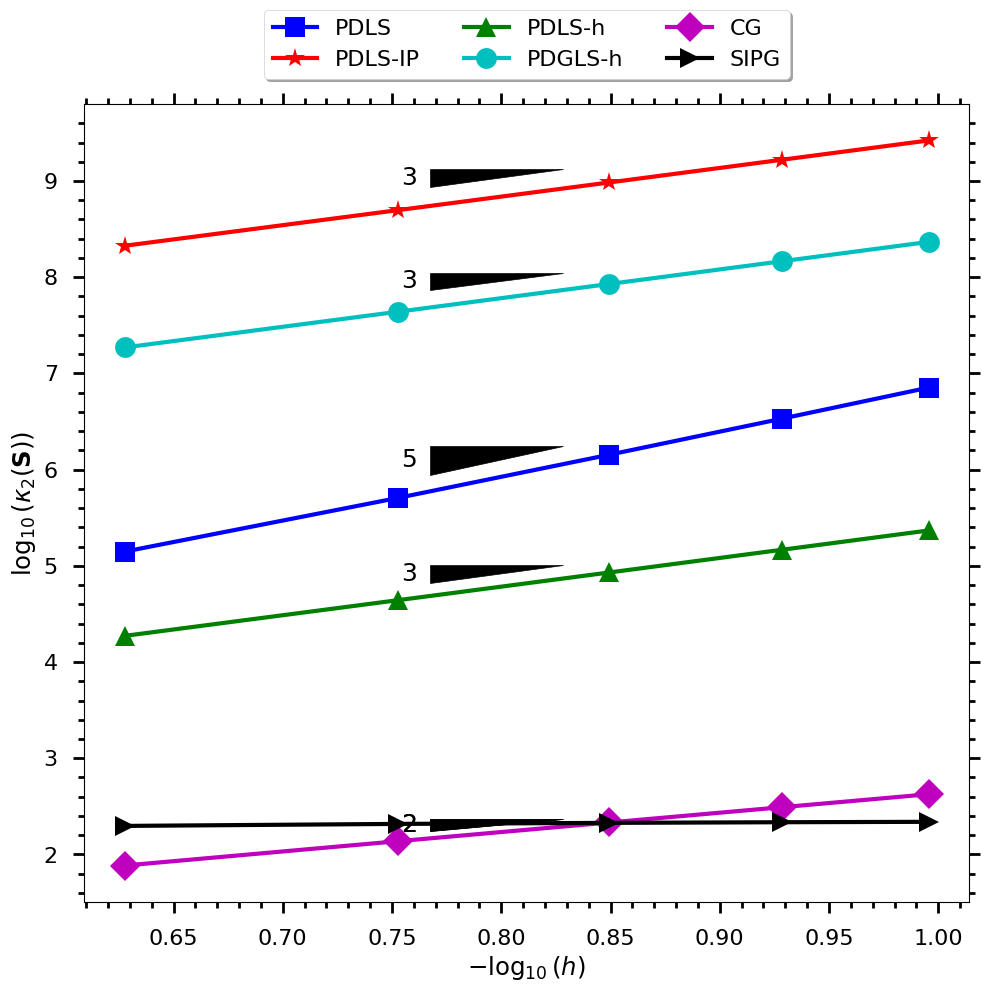

In [100]:
# case = ["LS-h", "HDG"]
# case = ["PDLS-h",]
case = ["PDLS", "PDLS-IP", "PDLS-h", "PDGLS-h", "CG", "SIPG"]
# case = ["CG", "HDG", "CLSq", "DLS", "LS-h (mesh-free)", "LS-h"]
slopes_values = {
    # "LS-h": 2,
    # "DLS": 2,
    # "CG": 2,
    # "HDG": 1,
    "PDGLS-h": 3,
    "PDLS-IP": 3,
    "PDLS-h": 3,
    "PDLS": 5,
    "SIPG": 2,
    "CG": 2,
}
degree = 2
# filename = f'cond_lsh_comparison_deg_{degree}_{geometry_suffix}'
filename = f'cond_pdlsh_comparison_deg_{degree}_{geometry_suffix}'
plot_cond_number_fixed_degree(
    case,
    results_deg2, 
    degree,
    ncol=3,
    slope_cond_number=slopes_values,
    slope_marker_idx_to_plot=-3,
    file_to_save=filename,
    size_frac=0.15,
    save_plot=True,
    figsize=(10, 10)
)

## Varying degree

In [92]:
fixed_num_of_elements = 100
results_fixed_mesh = dict()
for case in result_cases_dirname_list:
    results_fixed_mesh[case] = all_results[case][all_results[case]["Number of Elements"] == fixed_num_of_elements]

In [93]:
def plot_cond_number_fixed_mesh(
    selected_cases,
    results,
    degree,
    ncol=2,
    origin_slope_cond_number=(1.35, -2.25),
    save_plot=False,
    file_to_save='',
    dir_to_save='',
    figure_extension='png',
    display_plot=True,
    high_quality=False,
    size_frac=0.2,
    figsize=(8, 10)
):
    if high_quality:
            fig, ax = plt.subplots(figsize=figsize, dpi=500)
    else:
        fig, ax = plt.subplots(figsize=figsize)

    cycle_colors = cycle('brgcmk')
    markers = cycle(('s', '*', '^', 'o', 'D', '>', '<'))
    for case in selected_cases:
        color_scalar = next(cycle_colors)
        x_axis_values = results[case]["Degree"].values
        cond_numbers = results[case]["Condition Number"].values

        marker_scalar = next(markers)
#         ax.plot([np.nan], [np.nan], '', color='w', label='%s:' % case)
        ax.plot(
            x_axis_values, 
            cond_numbers,
            linestyle="-",
            marker=marker_scalar,
            color=color_scalar,
            markersize=15,
            linewidth=3,
            label=f"{case}"
        )
        
        
    box = ax.get_position()
#     ax.set_position([box.x0, box.y0 + box.height * 0.1,
#                      box.width, box.height * 0.9])
    ax.legend(loc='center', bbox_to_anchor=(0.5, 1.075),
              fancybox=True, shadow=True, ncol=ncol)
    
    plt.xlabel(r"Approximation degree")
    plt.ylabel(r"$\log_{10}(\kappa_2(\mathbf{S}))$")

    ax.tick_params(which='both', top=True, right=True)
    ax.xaxis.set_major_locator(AutoLocator())
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_major_locator(AutoLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which='both', width=2)
    ax.tick_params(which='major', length=8)
    ax.tick_params(which='minor', length=4)

    slope_value = degree + 1
    red_x, red_y = origin_slope_cond_number
#     annotation.slope_marker(
#         origin=(red_x, red_y), 
#         slope=slope_value, 
#         invert=True, 
#         size_frac=size_frac, 
#         pad_frac=0.1, 
#         text_kwargs={
#             'fontsize': 18,
#             'color': 'k'
#         },
#         poly_kwargs={
#             'color': 'k',
#             'alpha': 1
#         },
#         ax=ax
#     )

    plt.tight_layout()
    if save_plot:
        if dir_to_save == '':
            dir_to_save = './cond_result'

        os.makedirs(dir_to_save, exist_ok=True)

        if file_to_save == '':
            file_to_save = 'plot_cond_fixed_mesh'

        file_to_save = file_to_save + (".%s" % figure_extension)
        plt.savefig(file_to_save, bbox_inches='tight')

    if display_plot:
        plt.show()
        
    return

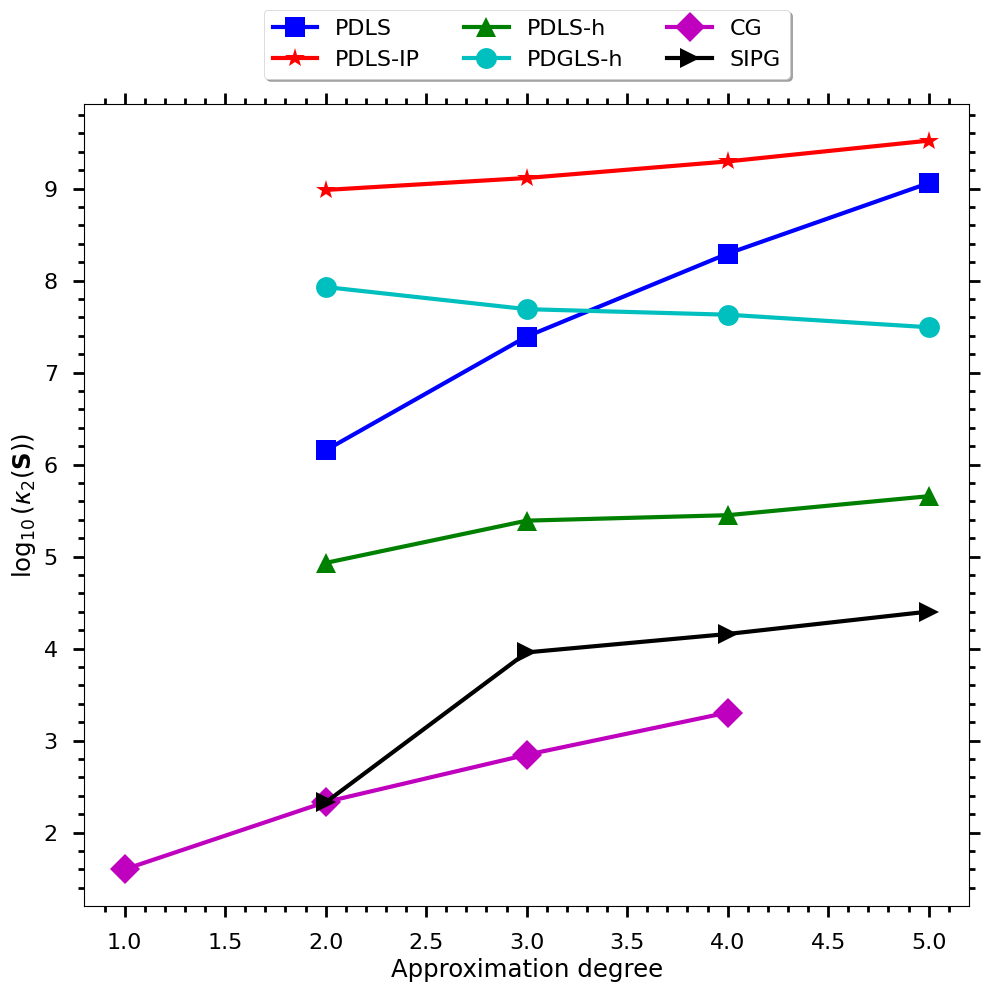

In [94]:
# case = ["PDLS-h"]
# case = ["LS-h", "HDG"]
case = ["PDLS", "PDLS-IP", "PDLS-h", "PDGLS-h", "CG", "SIPG"]
# case = ["CG", "HDG", "CLSq", "DLS", "LS-h (mesh-free)", "LS-h"]
# filename = f'cond_lsh_comparison_fixed_mesh_{geometry_suffix}'
filename = f'cond_pdlsh_comparison_fixed_mesh_{geometry_suffix}'
plot_cond_number_fixed_mesh(
    case,
    results_fixed_mesh, 
    degree,
    ncol=3,
    origin_slope_cond_number=(3.0, 6.5),
    file_to_save=filename,
    size_frac=0.15,
    save_plot=True,
    figsize=(10, 10)
)